<a href="https://colab.research.google.com/github/Diegodc2737/Tunagem-hiperparametros/blob/main/Tunagem_de_Hiperpar%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tunagem de Hiperparâmetros

### Importando dados

In [4]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/insurance.csv"
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Mise un place completa - Pré processamento de dados

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/max(dados['charges'])
dados['age'] = dados['age']/max(dados['age'])
dados['bmi'] = dados['bmi']/max(dados['bmi'])
dados = pd.get_dummies(dados, columns = ['sex', 'children', 'region'], drop_first=True)
dados.head()

,age,bmi,smoker,charges,sex_male,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,0.296875,0.525127,1,0.264777,0,0,0,0,0,0,0,0,1
1,0.281250,0.635611,0,0.027059,1,1,0,0,0,0,0,1,0
2,0.437500,0.621118,0,0.069773,1,0,0,1,0,0,0,1,0
3,0.515625,0.427348,0,0.344744,1,0,0,0,0,0,1,0,0
4,0.500000,0.543572,0,0.060637,1,0,0,0,0,0,1,0,0


In [3]:
# separar de veriáveis preditoras e variáveis resposta

X = dados.drop('smoker', axis = 1)
y = dados['smoker']

In [5]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [6]:
modelo = KNeighborsClassifier()

parametros = { 'n_neighbors' : np.arange(1, 50, 2) }

grid_search = GridSearchCV(modelo, param_grid = parametros,
                                   scoring = 'accuracy',
                                   cv = validacao,
                                   verbose = 1,
                                   n_jobs = -1)

grid_search.fit(X, y)



Fitting 30 folds for each of 25 candidates, totalling 750 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy', verbose=1)

In [7]:
grid_search.best_score_

0.9319717203456401

In [8]:
grid_search.cv_results_['mean_test_score']

array([0.93197172, 0.90631803, 0.89411402, 0.88291438, 0.87544608,
       0.87120974, 0.86623275, 0.86049639, 0.85127745, 0.84306101,
       0.83757715, 0.83035013, 0.82336625, 0.81887929, 0.81464482,
       0.81315789, 0.81265664, 0.81016908, 0.80892717, 0.80693151,
       0.80643774, 0.80718775, 0.80743276, 0.80643025, 0.80767404])

In [9]:
grid_search.best_params_

{'n_neighbors': 1}

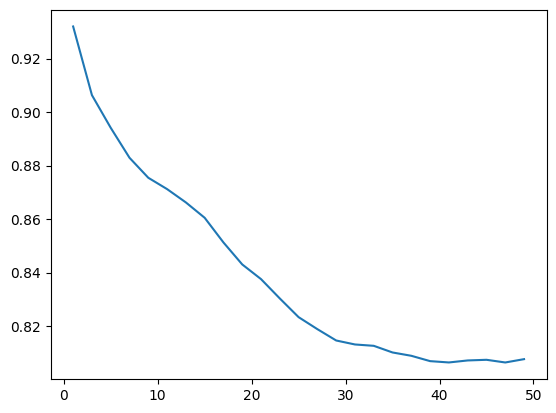

In [10]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, 50, 2), grid_search.cv_results_['mean_test_score']);

In [11]:
random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy',
                                   cv = validacao,
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
                   scoring='accuracy', verbose=1)

In [12]:
random_search.cv_results_['mean_test_score']

array([0.88192683, 0.81316164, 0.90806494, 0.84255415, 0.85102495,
       0.895124  , 0.82336625, 0.80767965, 0.80767778, 0.83682901])

In [13]:

random_search.best_score_

0.9080649384655669

In [14]:
random_search.best_params_

{'n_neighbors': 3}

In [15]:
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):

    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = metrica, cv = validacao,
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = metrica, cv = validacao,
                                n_iter = n_iter, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets)

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

In [16]:
parametros = {  'n_neighbors' : np.arange(1, 50, 2)  }

modelo = KNeighborsClassifier()

knn = Tunagem(modelo, X, y, parametros, tipo = 'random')

Fitting 30 folds for each of 20 candidates, totalling 600 fits

Acuracia: 0.9345
Melhores parâmetros: {'n_neighbors': 1}



In [17]:
np.arange(2, 21, 1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [18]:
parametros = {
              'max_depth' : np.arange(1,11),
              'min_samples_split': np.arange(2,21,2),
              'min_samples_leaf': np.arange(1,11),
                 }

modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 50)
arvore

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.9631
Melhores parâmetros: {'min_samples_split': 18, 'min_samples_leaf': 7, 'max_depth': 8}



DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=18)

In [19]:
parametros = {
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }

modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 5)
rf

Fitting 30 folds for each of 5 candidates, totalling 150 fits

Acuracia: 0.9624
Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 8, 'bootstrap': True}



RandomForestClassifier(max_depth=8, max_features=5, n_estimators=50)